<a href="https://colab.research.google.com/github/thangchu77/DeepLearning/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1:
Rewrite and calculate the loss function for each weight
$\sigma$(z)**

**Solution:**  
$\sigma$(z) = $\frac{1}{1 + e^{-z}}$  
$\sigma(z)'$ = $\sigma(z)(1 - \sigma(z)$  
The binary cross entry function is  
L = -(ylog$\hat{y}$ + (1 - y)log$(1 - \hat{y})$ with $\hat{y}$ = $\sigma(z)$, z = $w_0 + w_1 x_1 + w_2 x_2$  
$\frac{dL}{dw_0}$ = $\hat{y}$ - y   
$\frac{dL}{dw_1}$ = $(\hat{y}$ - y)$x_1$    
$\frac{dL}{dw_2}$ = $(\hat{y}$ - y)$x_2$  
Notice that if we stack the above result into the vector $\frac{dL}{dW}$, we will obtain the similiar result that we have for the Linear Regression which is  
$\frac{dL}{dW}$ = $X^T(\hat{Y} - Y)$


**Question 2:
Prove that sigmoid function is created through differential equation of binary cross entropy function**

**Solution:**  
Suppose we have an abitrary function f such that $f(w^Tx)$ outputs the probability. Since f outputs the probability, it has the range from 0 to 1. Since the problem only has 2 outcomes 0 or 1, we use the Bernoulli distribution to represent the problem  

$p(y_i|w, x_i) = f(w^Tx_i)^{y_i}(1 - f(w^Tx_i)^{1 - y_i}$

For the whole dataset, we will have

$p(Y|w, X) = \prod_{i=1}^nf(w^Tx_i)^{y_i}(1 - f(w^Tx_i)^{1 - y_i}$

Since we want to output $p(y_i|w, x_i)$ as close to 1 as possible if $y_i$ is 1 in the dataset and vice versa, we want to apply the MLE problem by find the w such that  
w = argmax $p(Y|w, X)$  
Apply the negative log-likelihood for each point in the dataset we have  
$-logp(Y|w, X) = -log\prod_{i=1}^nf(w^Tx_i)^{y_i}(1 - f(w^Tx_i)^{1 - y_i} = \sum_{i=1}^n -logf(w^Tx_i)^{y_i}(1 - f(w^Tx_i)^{1 - y_i}$  
Consider the term  
$-logf(w^Tx_i)^{y_i}(1 - f(w^Tx_i)^{1 - y_i} = -y_ilogf(w^Tx_i) - (1 - y_i)log(1 - f(w^Tx_i))$  
Taking the derivative with respect to w of the above term we have  
$(\frac{-y_i}{f(w^Tx_i)} + \frac{1 - y_i}{1 - f(w^Tx_i)})\frac{df(w^Tx_i)}{dw}$ = $\frac{f(w^Tx_i) - y_i}{f(w^Tx_i)(1 - f(w^Tx_i))}\frac{df(w^Tx_i)}{dw}$

Denote $w^Tx_i$ as  
$\frac{df(s)}{dw} = \frac{df(s)}{ds}\frac{s}{w} = \frac{df(s)}{ds}x$  

Since we want to simplify the denominator, we write as followed

$f(s)(1 - f(s)) = \frac{df(s)}{ds}$  
$ds = (\frac{1}{f(s)} + \frac{1}{1 - f(s)})df(s)$  
$s = lnf(s) - ln(1-f(s)) = \frac{lnf(s)}{ln(1-f(s))}$  
$e^s = \frac{f(s)}{1 - f(s)}$  
$f(s) = \frac{1}{1 - e^{s}}$  
$f(w^Tx) = \frac{1}{1 - e^{w^Tx}}$



**Question 3: Adjust the learning rate, draw the loss function for the accepted/declined rent problems**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Text(0, 0.5, 'year of experience')

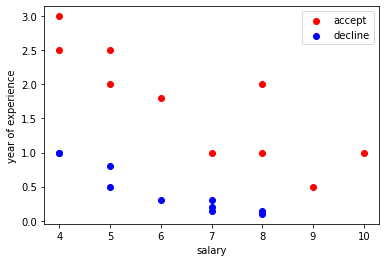

In [ ]:
#Load the data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/3. Logistic regression/dataset.csv').values
N, d = data.shape
x = data[:,:d-1].reshape(-1, d-1)
y = data[:,d-1].reshape(-1,1)

#Separate the data into rent_accept and rent_decline 
rent_accept = x[y[:,0]==1]
rent_decline = x[y[:,0]==0]

#Visualize 2 classes above
plt.scatter(rent_accept[:,0], rent_accept[:,1], c = 'red', label='accept')
plt.scatter(rent_decline[:,0], rent_decline[:,1], c = 'blue', label='decline')
plt.legend(loc=1)
plt.xlabel('salary')
plt.ylabel('year of experience')


In [ ]:
#Initialize the weight and add a column of 1 into the xdata
w = np.zeros((d, 1))
x = np.hstack((np.ones((N,1)), x))

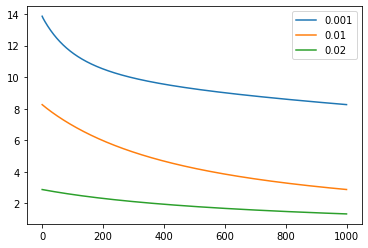

In [ ]:
#Initialize the learning rate, epoch, and start to learn the best parameters
learning_rate = [0.001, 0.01, 0.02]
epochs = 1000
for lr in learning_rate:
  cost = np.zeros((epochs,1))
  for i in range(epochs):
    prediction = sigmoid(np.dot(x, w))
    cost[i] = -np.sum(np.multiply(y, np.log(prediction)) + np.multiply(1 - y, np.log(1 - prediction)))
    w = w - lr * np.dot(x.T, prediction - y)
  plt.plot(cost, label = str(lr))
plt.legend()

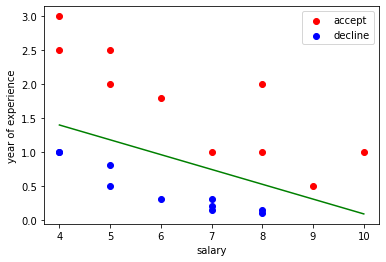

In [ ]:
#Draw the separate line
threshold = 0.5
plt.scatter(rent_accept[:,0], rent_accept[:,1], c = 'red', label='accept')
plt.scatter(rent_decline[:,0], rent_decline[:,1], c = 'blue', label='decline')
plt.legend(loc=1)
plt.xlabel('salary')
plt.ylabel('year of experience')
plt.plot((4, 10),(-(w[0]+4*w[1]+ np.log(1/threshold-1))/w[2], -(w[0] + 10*w[1]+ np.log(1/threshold-1))/w[2]), 'g')

**Question 4: XOR problem using logistic regression and explain why it does not work? Change the linear function into non-linear function such as x-a/x-b, scaled parabola,... to solve the problem**


**Answer:**  
No logisitic regression will be able to solve the XOR problem because it is linear function (a line) and the maximum accuracy for XOR problem using logistic regression will only be 75% 


In [ ]:
x1=np.array([0,0,1,1]).reshape(-1,1)
x2=np.array([0,1,1,0]).reshape(-1,1)
a=x1^x2
print(a)
# x1_true=x1[np.where(a==1)]
# x1_false=x1[np.where(a==0)]
# x2_true=x2[np.where(a==1)]
# x2_false=x2[np.where(a==0)]

[[0]
 [1]
 [0]
 [1]]


In [ ]:
plt.plot(x1_true,x2_true,'ro',markersize=8,label='True')
plt.plot(x1_false,x2_false,'bs',markersize=8,label='False')
plt.legend()
plt.xlabel('x1')
plt.ylabel('x2')

NameError: ignored

**Question 5: Replicate the following tutorial** 
https://l.facebook.com/l.php?u=https%3A%2F%2Fwww.datacamp.com%2Fcommunity%2Ftutorials%2Funderstanding-logistic-regression-python%3Ffbclid%3DIwAR2PzyUqn9OmBgnO-t7IodPChBX-U6VKEk-M-743KODWQ4tlJ2ePTlG_8jo&h=AT2TESgGzqa2bI9soQreqMyYxQk8Rm8rW4JWO7i5aXRO3v2NETXbUUbaqeOEYB3wIXWyQPpnwrMJKN3LQEQBqBs4wWQ8RlYkdKRoPdl0_ZiDbFHj7wTSqNOqIc8XKKBjwTzDzeEa2Q&__tn__=-UK-R&c[0]=AT1jxDO5nhWAIOizzR6suOYj8dXhOZsvbx2jW5OoxU0miRJgvMNpLNgjmGtEsLoUjzf4M9BQzcA3_grSrxeGWeS2LbNyPZGxly2DhNteehc00cyi64NKfMfgRLEqOsuoi3Az0dkr-o7a5A0ZnVuxj_j-qpyhzbNiGAc1ptp-EXBejM29HieW_B2Srob0bWICnOT6nkIi75lRSI_l 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns
%matplotlib inline

In [ ]:
#Read the data
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('/content/drive/MyDrive/Machine Learning/3. Logistic regression/diabetes.csv', names=col_names, header=None)
features = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[features]
Y = pima.label

#Split the train and test set
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

#Create a model and predict
model = LogisticRegression()
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)

#Evaluate the result
confusion = metrics.confusion_matrix(Y_test, Y_predict)

#Print the accuracy, precision, recall
print(metrics.accuracy(Y_test, Y_predict))
print(metrics.precision(Y_test, Y_predict))
print(metrics.recall(Y_test, Y_predict))


In [ ]:
#Plot confusion matrix 
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(confusion), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Question 6: Prove that cross entropy loss function is convex function, but mean square error is not a convex function**